<h1 style="font-family: 'Times New Roman', serif;">Trend Following in Forex Markets</h1>
<h4 style="font-family: 'Times New Roman', serif;">This project is being done with the guidance of Prof. Carlos De Oliveira (<a href="mailto:Carlos.DeOliveira@nyu.edu">Carlos.DeOliveira@nyu.edu</a>)</h4>



## <p style="font-family: 'Times New Roman', serif;">Introduction</p>

<p style="font-family: 'Times New Roman', serif;">This notebook is dedicated to the analysis of trend data for the Forex currency pair EUR/USD (Euro, United States Dollar). We focus on aggregated daily data spanning two years, from March 26, 2022, to March 22, 2024. The data used in this project was sourced from polygon.io and is stored in a MongoDB database.</p>

<p style="font-family: 'Times New Roman', serif;">The dataset encompasses the following attributes:</p>

<style>
    table.corporate-finance {
        width: 80%; /* Adjust to suit content dimensions */
        margin-left: auto;
        margin-right: auto;
        border-collapse: collapse;
        border: 1px solid #2A3439; /* Gunmetal gray for a refined look */
        font-family: 'Times New Roman', serif; /* Consistency in font usage */
        color: #FFFFFF; /* White text for contrast */
    }
    th, td {
        padding: 12px; /* Sufficient padding for aesthetic spacing */
        text-align: left;
        border-bottom: 1px solid #A9A9A9; /* Lighter gray for subtle separation */
    }
    th {
        background-color: #2A3439; /* Gunmetal gray background */
        color: #FFFFFF; /* White text for legibility */
    }
    tr:hover {
        background-color: #474747; /* Slightly lighter gray for hover effect */
    }
    tr:nth-child(odd) {
        background-color: #333333; /* Consistent dark gray for rows */
    }
</style>

<table class="corporate-finance">
    <tr>
        <th>Attribute</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>Date</td>
        <td>The start date of the given time period.</td>
    </tr>
    <tr>
        <td>Open</td>
        <td>The opening price of the currency pair for the given time period.</td>
    </tr>
    <tr>
        <td>High</td>
        <td>The highest price reached by the currency pair during the given time period.</td>
    </tr>
    <tr>
        <td>Low</td>
        <td>The lowest price of the currency pair during the given time period.</td>
    </tr>
    <tr>
        <td>Close</td>
        <td>The closing price of the currency pair at the end of the given time period.</td>
    </tr>
    <tr>
        <td>Volume</td>
        <td>The total trading volume of the currency pair during the given time period.</td>
    </tr>
    <tr>
        <td>Volume Weighted</td>
        <td>The volume-weighted average price (VWAP) of the currency pair.</td>
    </tr>
</table>

<p style="font-family: 'Times New Roman', serif;">Each data point represents aggregated daily data for a total of 671 data points across the specified period.</p>


In [ ]:
# Necessary imports
import math
import pandas as pd
import numpy as np
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

<p style="font-family: 'Times New Roman', serif;"> Extracting data from MongoDB database using MongoClient in the pymongo library.</p>

In [1]:

client = MongoClient('localhost', 27017)
db = client['Project_TrendFollowing'] 
collection = db['eurusdRates_2y'] 

# Retrieve data from MongoDB collection
cursor = collection.find({})  
data = list(cursor)  

client.close()

df = pd.DataFrame(data)

df.drop(['_id', 'transactions'], axis=1, inplace=True)

print(df)


                    date     open     high      low    close  volume  \
0    2022-03-26 00:00:00  1.09830  1.09830  1.09830  1.09830       1   
1    2022-03-27 00:00:00  1.09792  1.09865  1.09772  1.09813    3732   
2    2022-03-28 00:00:00  1.09816  1.09994  1.09430  1.09914  167202   
3    2022-03-29 00:00:00  1.09921  1.11370  1.09684  1.10912  190840   
4    2022-03-30 00:00:00  1.10911  1.11710  1.10870  1.11610  180692   
..                   ...      ...      ...      ...      ...     ...   
666  2024-03-18 00:00:00  1.08831  1.09070  1.08650  1.08730  115956   
667  2024-03-19 00:00:00  1.08731  1.08780  1.08330  1.08610  145459   
668  2024-03-20 00:00:00  1.08616  1.09390  1.08350  1.09368  145044   
669  2024-03-21 00:00:00  1.09360  1.09430  1.08540  1.08618  158012   
670  2024-03-22 00:00:00  1.08621  1.08680  1.08000  1.08610  124474   

     volume_weighted  
0             1.0983  
1             1.0982  
2             1.0970  
3             1.1054  
4             1.1133

## <p style="font-family: 'Times New Roman', serif;"> Data Cleaning and EDA </p>

In [2]:
df.describe()

,open,high,low,close,volume,volume_weighted
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,1.063021,1.066748,1.059382,1.063287,139293.040238,1.063026
std,0.035219,0.034568,0.035823,0.035377,81736.466369,0.035138
min,0.959510,0.967080,0.953570,0.959510,1.000000,0.960900
25%,1.051145,1.054770,1.046950,1.051155,112401.000000,1.051900
50%,1.072320,1.075310,1.069600,1.072400,163714.000000,1.071800
75%,1.088350,1.091750,1.085200,1.088470,192125.500000,1.088400
max,1.123710,1.127570,1.123500,1.124600,337599.000000,1.124000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             671 non-null    object 
 1   open             671 non-null    float64
 2   high             671 non-null    float64
 3   low              671 non-null    float64
 4   close            671 non-null    float64
 5   volume           671 non-null    int64  
 6   volume_weighted  671 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 36.8+ KB


#### <p style="font-family: 'Times New Roman', serif;"> Setting the Datetime Column as the Index: </p>

<p style="font-family: 'Times New Roman', serif;"> For time series analysis, it's beneficial to set the datetime column as the index of the DataFrame. This setup enhances the DataFrame's structure, making it easier to perform time-based queries and utilize pandas' time series functionalities, such as resampling or window functions. </p>


In [4]:
# Ensuring the 'timestamp' column is in datetime format
df['timestamp'] = pd.to_datetime(df['date'])

# Setting this datetime column as the index of the DataFrame
df.set_index('timestamp', inplace=True)

# Drop the date column 
df.drop('date', axis=1, inplace = True)

# Print the first 5 elements of the updated dataframe
df.head(5)


,open,high,low,close,volume,volume_weighted
timestamp,,,,,,
2022-03-26,1.09830,1.09830,1.09830,1.09830,1,1.0983
2022-03-27,1.09792,1.09865,1.09772,1.09813,3732,1.0982
2022-03-28,1.09816,1.09994,1.09430,1.09914,167202,1.0970
2022-03-29,1.09921,1.11370,1.09684,1.10912,190840,1.1054
2022-03-30,1.10911,1.11710,1.10870,1.11610,180692,1.1133


<p style="font-family: 'Times New Roman', serif;">Having cleaned the data, we now commence with the exploratory data analysis (EDA).</p>

<p style="font-family: 'Times New Roman', serif;">In the context of the global and continuous trading of forex currencies, the traditional open and close prices often present ambiguities and may not effectively capture market dynamics across various time zones. To address this, we will leverage the volume-weighted average price (VWAP) to explore market trends more accurately. The VWAP provides a comprehensive view of market activity by accounting for volume at different price levels throughout the trading day.</p>

<p style="font-family: 'Times New Roman', serif;">In this analysis phase, we will decompose the volume-weighted time series data to extract its trend and seasonal components, which will be instrumental for further analysis.</p>


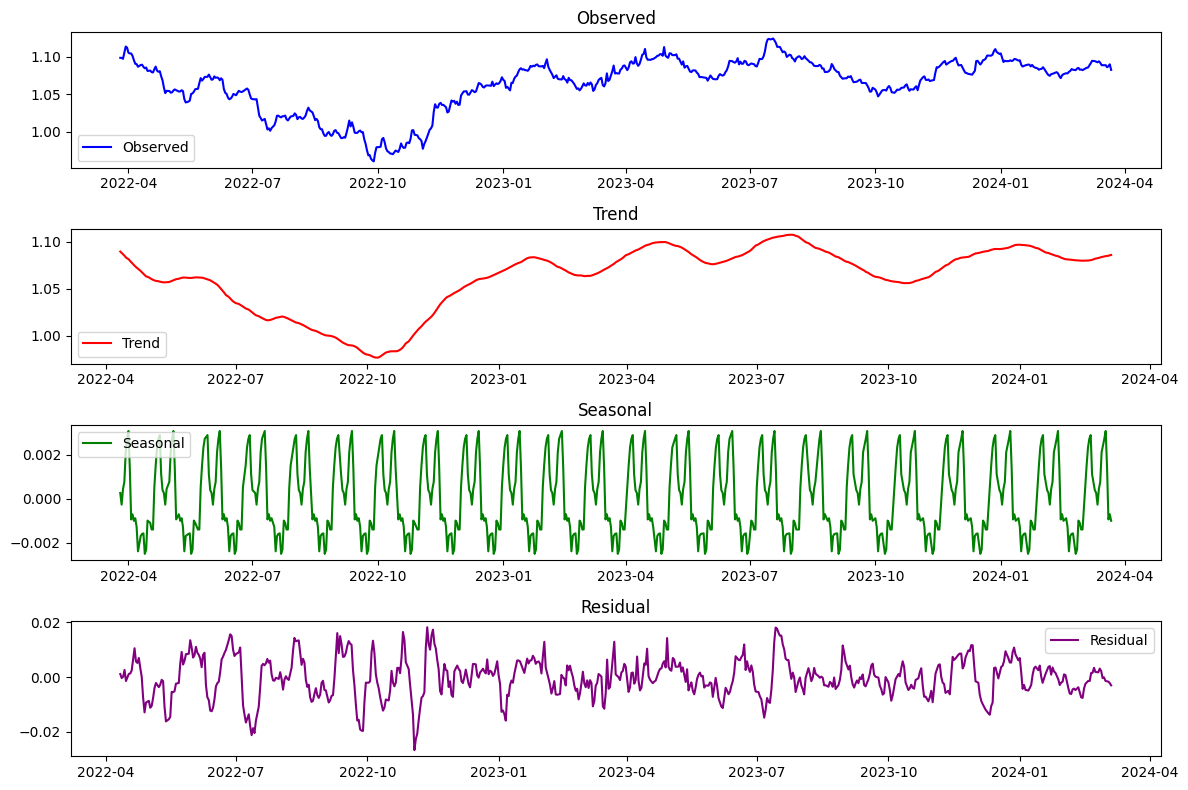

In [5]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['volume_weighted'], model='additive', period=30)  

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index, decomposition.observed, label='Observed', color='blue')
plt.legend()
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(df.index, decomposition.trend, label='Trend', color='red')
plt.legend()
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(df.index, decomposition.seasonal, label='Seasonal', color='green')
plt.legend()
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(df.index, decomposition.resid, label='Residual', color='purple')
plt.legend()
plt.title('Residual')

plt.tight_layout()

plt.show()

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['volume_weighted'], model='additive', period=30)  # Assuming a period of 30 for monthly seasonality

# Extract the trend component
trend = decomposition.trend

# Print the trend component as a list
trend_list = trend.tolist()

<div style="font-family: 'Times New Roman', serif;">

#### Plotting the 30 day moving average with the Trend component

In this analysis, we explore the forex data focusing on the volume-weighted average prices. The goal is to understand underlying trends and movements over time. We utilize Python's `pandas` and `matplotlib` libraries to process and visualize the data.


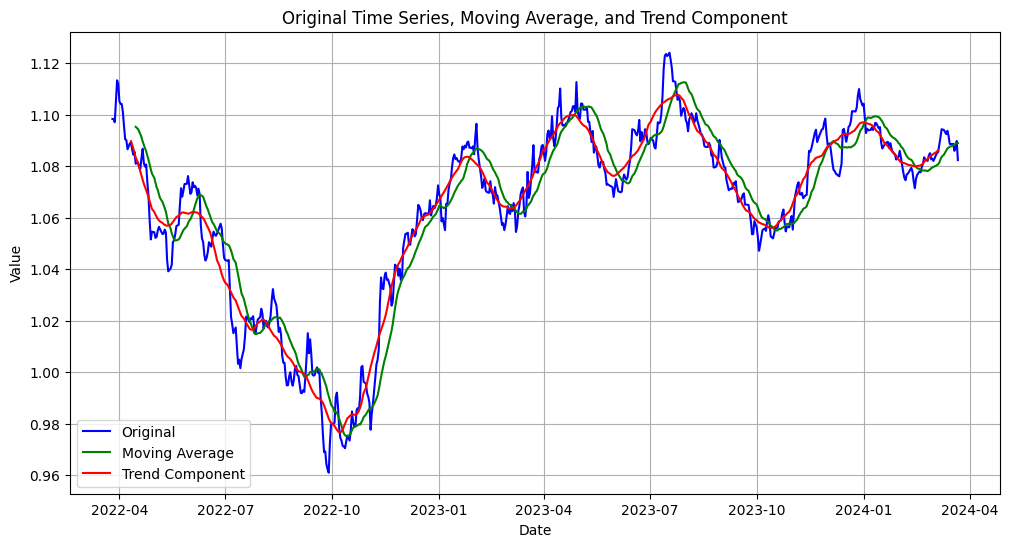

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the window size for the moving average
window_size = 20

# Calculate the moving average
moving_avg = df['close'].rolling(window=window_size).mean()

# Plot the original time series, moving average, and trend component
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['volume_weighted'], label='Original', color='blue')
plt.plot(df.index, moving_avg, label='Moving Average', color='green')
plt.plot(df.index, trend, label='Trend Component', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series, Moving Average, and Trend Component')
plt.legend()
plt.grid(True)
plt.show()


<p style="font-family: 'Times New Roman', serif;"> Extracting the trent component as a column called 'volume_weighted_trend'. </p>


In [7]:
# Perform seasonal decomposition
decomposition_close = seasonal_decompose(df['volume_weighted'], model='additive', period=30)  # Assuming a period of 30 for monthly seasonality

# Extract the trend component
trend_close = decomposition_close.trend


df['volume_weighted_trend'] = 0
trend_list_close = trend_close.tolist()

for i in range(len(df['volume_weighted_trend'])):
    if trend_list_close[i] != None:
        df.iloc[i, df.columns.get_loc('volume_weighted_trend')] = trend_list_close[i]


<div style="font-family: 'Times New Roman', serif;">

### Identifying the trend at every data point on the basis of Moving Averages and RSI

This section details the creation of technical indicators used to identify potential trading signals in forex data. We utilize short-term and long-term moving averages along with the Relative Strength Index (RSI) to analyze trends and momentum in the volume-weighted prices of the forex currency.

#### Technical Indicators Computation

1. **Moving Averages:**
   - **Short-Term Moving Average (SMA_short):** This is calculated over a 3-period window on the `volume_weighted_trend` data. It represents a quick view of the price movement and is sensitive to recent price changes.
   - **Long-Term Moving Average (SMA_long):** Calculated over a 12-period window, this moving average provides a smoother and more stable trend line, reflecting the underlying longer-term trend in the data.

2. **Relative Strength Index (RSI):**
   - The RSI is a momentum oscillator that measures the speed and change of price movements. Here, it is calculated over a 14-day window, where gains and losses are separated, smoothed, and compared. An RSI above 50 typically indicates that gains surpass losses, suggesting upward momentum.

#### Trend Identification
Based on the calculated SMA and RSI, the trend is identified as:
   - **Uptrend:** If the short-term moving average is above the long-term moving average and the RSI is above 50.
   - **Downtrend:** If the short-term moving average is below the long-term moving average and the RSI is below 50.
   - **No Trend:** If neither of these conditions is met, indicating that the market is in a state of equilibrium without a clear direction.

#### Data Columns Added
The dataframe has been enhanced with the following columns:
   - `SMA_short`: Contains the short-term moving average values.
   - `SMA_long`: Contains the long-term moving average values.
   - `RSI`: Contains the Relative Strength Index values.
   - `Trend`: Describes the current trend based on the SMA and RSI indicators.

This approach helps in visualizing and quantifying the market behavior, aiding in the decision-making process for trades.

</div>

In [8]:
window_short = 3  # Short-term moving average
window_long = 12 # Long-term moving average

df['SMA_short'] = df['volume_weighted_trend'].rolling(window=window_short, min_periods=1).mean()
df['SMA_long'] = df['volume_weighted_trend'].rolling(window=window_long, min_periods=1).mean()

# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window, min_periods=1).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window, min_periods=1).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df['volume_weighted_trend'])

# Identify trends based on SMA and RSI
df['Trend'] = np.where((df['SMA_short'] > df['SMA_long']) & (df['RSI'] > 50), 'Uptrend',
                      np.where((df['SMA_short'] < df['SMA_long']) & (df['RSI'] < 50), 'Downtrend', 'No Trend'))

print(df.head())


               open     high      low    close  volume  volume_weighted  \
timestamp                                                                 
2022-03-26  1.09830  1.09830  1.09830  1.09830       1           1.0983   
2022-03-27  1.09792  1.09865  1.09772  1.09813    3732           1.0982   
2022-03-28  1.09816  1.09994  1.09430  1.09914  167202           1.0970   
2022-03-29  1.09921  1.11370  1.09684  1.10912  190840           1.1054   
2022-03-30  1.10911  1.11710  1.10870  1.11610  180692           1.1133   

            volume_weighted_trend  SMA_short  SMA_long  RSI     Trend  
timestamp                                                              
2022-03-26                    NaN        NaN       NaN  NaN  No Trend  
2022-03-27                    NaN        NaN       NaN  NaN  No Trend  
2022-03-28                    NaN        NaN       NaN  NaN  No Trend  
2022-03-29                    NaN        NaN       NaN  NaN  No Trend  
2022-03-30                    NaN        N

<div style="font-family: 'Times New Roman', serif;">

### Assigning trend numbers to datapoints for further computation

The code snippet provided is designed to analyze and label sequential trends in a Forex currency pair time series dataset. This is done by iterating through the dataset and assigning a unique identifier to each distinct trend observed in the data. Below, we detail the process and logic implemented in the code:

#### Initialization
- **Trend Numbering**: We initialize `trend_number` to 0. This variable will increment each time a new trend is detected, serving as a unique identifier for each trend.
- **Current Trend**: `current_trend` is initialized to `None`. This variable holds the current trend type ('Uptrend' or 'Downtrend') that is being tracked.
- **Trend Started**: `trend_started` is a boolean flag initialized to `False`. It indicates whether a trend has been started and is currently being tracked.
- **Trend Numbers List**: `trend_numbers` is a list that will store the trend number for each row in the DataFrame.

#### Trend Detection Logic
- The code iterates over each row of the DataFrame using a `for` loop. For each row:
  - If no trend has been started (`trend_started` is `False`), the code checks if the current row's trend is either 'Uptrend' or 'Downtrend'.
    - If true, it marks the start of a new trend. It sets `trend_started` to `True`, updates `current_trend` to the current row's trend, and increments `trend_number` by 1.
  - If a trend has already started (`trend_started` is `True`), the code checks if the current row's trend differs from `current_trend` and is one of the recognized trend types.
    - If true, it updates `current_trend` to the new trend and increments `trend_number` by 1.
- After evaluating the trend type, if a trend is active (`trend_started` is `True`), the current `trend_number` is appended to `trend_numbers`. If no trend is active, a 0 is appended to indicate no trend.

#### Storing Trend Numbers
- After the loop, `trend_numbers` list, which contains the trend identifier for each data point, is assigned to a new column in the DataFrame called `Trend_Number`.

#### Output
- Finally, the list of trend numbers is printed, showing the assigned trend identifier for each data point in the DataFrame.

This method of trend identification is crucial for further analysis, allowing us to segment the data based on identified trends and analyze the characteristics of each trend segment separately.


In [9]:
# Initialize trend numbering
trend_number = 0
current_trend = None
trend_started = False

# List to store trend numbers
trend_numbers = []


for index, row in df.iterrows():
    if not trend_started:
        if row['Trend'] in ['Uptrend', 'Downtrend']:
            trend_started = True
            current_trend = row['Trend']
            trend_number += 1
    else:
        if row['Trend'] != current_trend and row['Trend'] in ['Uptrend', 'Downtrend']:
            current_trend = row['Trend']
            trend_number += 1

    if trend_started:
        trend_numbers.append(trend_number)
    else:
        trend_numbers.append(0)

df['Trend_Number'] = trend_numbers

print(df['Trend_Number'].to_list())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 

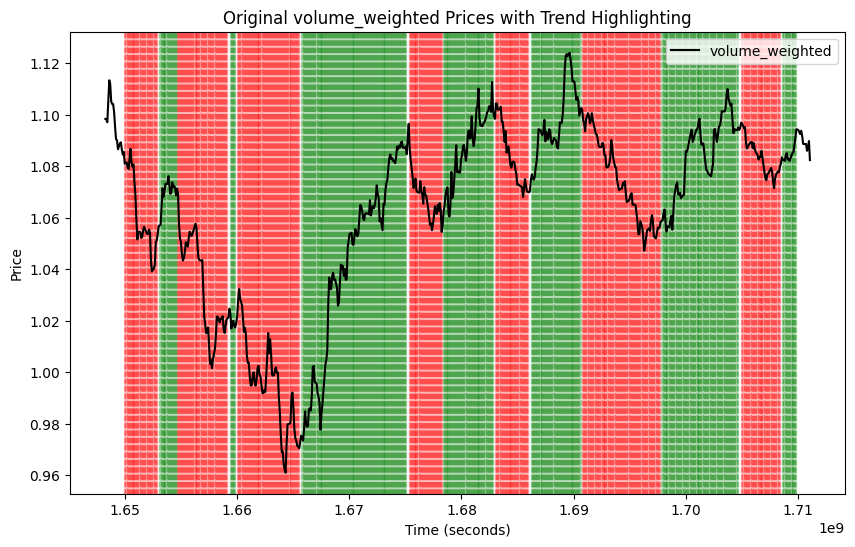

In [10]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Convert timestamps to numeric representation in seconds
numeric_index = df.index.astype('int64') / 10**9  # Convert nanoseconds to seconds

# Plot the original close prices
ax.plot(numeric_index, df['volume_weighted'], label='volume_weighted', color='black')


# Plot translucent bars for uptrend and downtrend regions
for idx, row in enumerate(df.itertuples()):
    if row.Trend == 'Uptrend' and idx + 1 < len(df):
        ax.axvspan(numeric_index[idx], numeric_index[idx + 1], color='green', linestyle='--', alpha=0.3)
    elif row.Trend == 'Downtrend' and idx + 1 < len(df):
        ax.axvspan(numeric_index[idx], numeric_index[idx + 1], color='red', linestyle='--',  alpha=0.3)

# Add legend and labels
ax.legend()
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Price')
ax.set_title('Original volume_weighted Prices with Trend Highlighting')

# Show the plot
plt.show()


<div style="font-family: 'Times New Roman', serif;">

### Plotting VWAP, SMAs and RSI

The graph presents a detailed trend analysis using moving averages and the Relative Strength Index (RSI) over a time period starting from April 2022 to April 2024. 

#### Graph Features:

- **Original VWAP**: Displayed as a black line with some transparency, representing the daily closing prices of the financial instrument under analysis.

- **Short-term Simple Moving Average (SMA)**: Illustrated with a red line, this moving average captures the short-term trend by smoothing out price fluctuations over a shorter period.

- **Long-term Simple Moving Average (SMA)**: Shown with a green line, this moving average smooths price movements over a longer period to highlight longer-term trends.

- **SMA Crossovers**: Indicated by blue dots, these points mark where the short-term SMA crosses the long-term SMA, which may suggest potential trend reversals.

- **Trend Identification**: The background is color-coded to reflect the identified trends.
  - **Uptrend**: Marked with light green vertical bands, indicating periods where the short-term SMA is above the long-term SMA and the RSI is above 50, suggesting bullish conditions.
  - **Downtrend**: Highlighted with light salmon vertical bands, showing periods where the short-term SMA is below the long-term SMA and the RSI is below 50, implying bearish conditions.

- **Relative Strength Index (RSI)**: Plotted on a secondary y-axis (on the right), this momentum oscillator is shown with a dashed blue line. The RSI values range from 0 to 100, with the graph including this scale for reference.

#### Interpretations:

- **Crossover Points**: The crossovers between the short-term and long-term SMAs, combined with RSI readings, are used to define the trend direction. These points are critical  as they can signify moments to consider entering or exiting trades.

- **Trend Regions**: The color-coded background is for visualizing the duration and consistency of identified trends, allowing to quickly assess market conditions over time.

- **RSI Levels**: The RSI line provides insights into the momentum of the price movements, with levels above 50 indicating overbought conditions and below 50 suggesting oversold conditions.



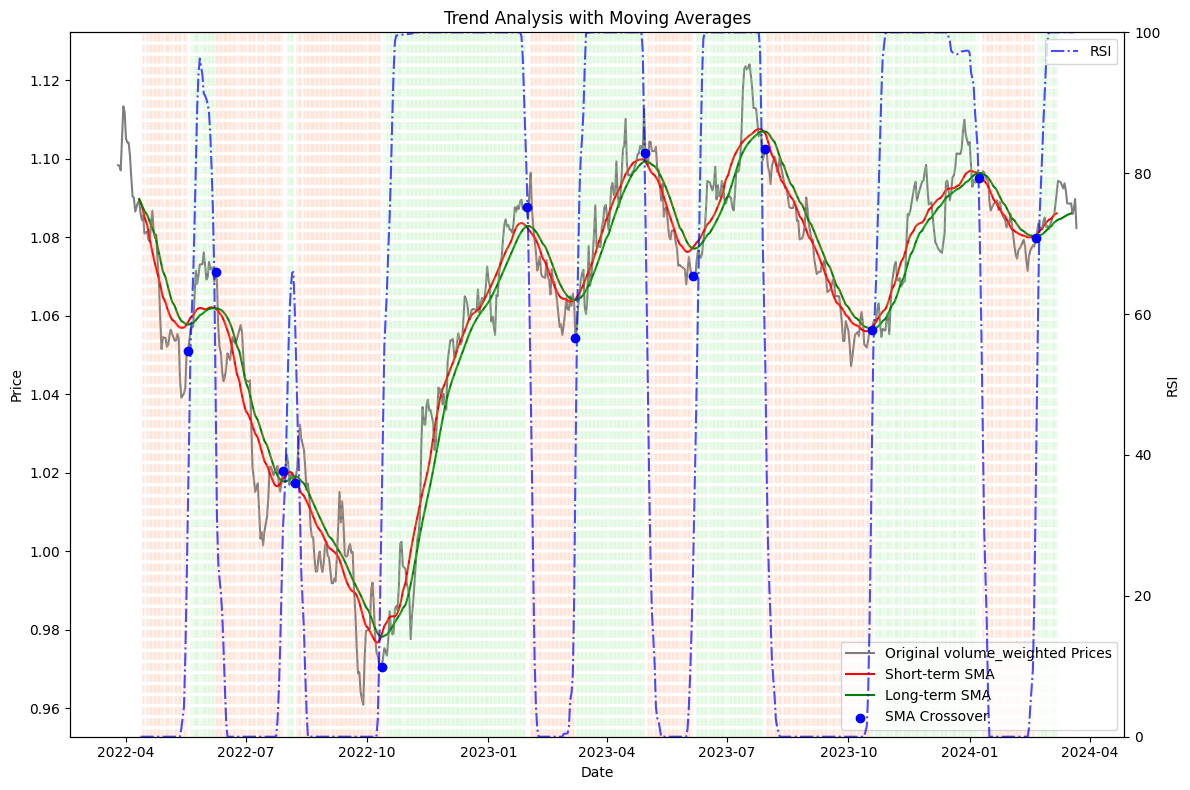

In [11]:
# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the volume-weighted average price (VWAP) with transparency
ax1.plot(df.index, df['volume_weighted'], label='Original volume_weighted Prices', color='black', alpha=0.5)

# Plot the short-term and long-term SMAs
ax1.plot(df.index, df['SMA_short'], label='Short-term SMA', color='red')
ax1.plot(df.index, df['SMA_long'], label='Long-term SMA', color='green')

# Color code the trends directly on the price plot
for i in range(1, len(df)):
    if df['Trend'].iloc[i] == 'Uptrend':
        ax1.axvline(x=df.index[i], color='lightgreen', linestyle='--', alpha=0.15)
    elif df['Trend'].iloc[i] == 'Downtrend':
        ax1.axvline(x=df.index[i], color='lightsalmon', linestyle='--', alpha=0.15)

# Highlight the crossovers
crossovers = df[(df['SMA_short'] > df['SMA_long']) & (df['SMA_short'].shift(1) < df['SMA_long'].shift(1)) | 
                (df['SMA_short'] < df['SMA_long']) & (df['SMA_short'].shift(1) > df['SMA_long'].shift(1))]
ax1.scatter(crossovers.index, crossovers['volume_weighted'], color='blue', label='SMA Crossover', zorder=5)

# Set labels and title for the first subplot
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.set_title('Trend Analysis with Moving Averages')
ax1.legend(loc='lower right')

# Create a secondary y-axis for RSI
ax2 = ax1.twinx()  
ax2.plot(df.index, df['RSI'], label='RSI', color='blue', linestyle='-.', alpha=0.7)
ax2.set_ylabel('RSI')
ax2.legend(loc='upper right')
ax2.set_ylim(0, 100)  # RSI typically ranges from 0 to 100
ax2.grid(False) 

# Improve layout and show the plot
plt.tight_layout()
plt.show()


<div style="font-family: 'Times New Roman', serif;">

###  Max Drawdowns and Optimal Leverage

#### Calculation of Daily Drawdowns

Daily drawdowns are calculated to understand the daily losses within each trend. The drawdown for a day is defined as the percentage change in VWAP from the previous day, provided that the day is within the same trend. The calculation is performed as follows:

1. **Initialize the `Daily_Drawdowns` column**:
   - A new column is initialized in the DataFrame to store the daily drawdown values.

2. **Iterate through each row**:
   - For each day, check if it belongs to the same trend as the previous day.
   - If yes, calculate the drawdown as:
     $$
     \text{Drawdown} = \left( \frac{\text{Current Day's VWAP} - \text{Previous Day's VWAP}}{\text{Previous Day's VWAP}} \right) \times 100
     $$

   - If it is the first day of a trend, set the drawdown to 0, as there is no previous day for comparison within the same trend.

3. **Handle Missing Values**:
   - Fill any missing drawdown values with 0, ensuring data integrity.

#### Calculation of Maximum Drawdown

To capture the most significant single-day loss in each trend, the maximum drawdown is calculated as follows:

1. **Group by `Trend_Number`**:
   - The data is grouped by trend, ensuring that calculations are confined to the same market movement or condition.

2. **Apply a Custom Function**:
   - A custom function, `get_max_drawdown`, is applied to each group. This function identifies and returns the largest (most negative) drawdown, capturing the worst single-day performance within each trend.


In [12]:
# Initialize a column to store daily drawdowns
df['Daily_Drawdowns'] = 0.0

# Calculate drawdowns only within the same trend
for i in range(1, len(df)):
    if df.iloc[i]['Trend_Number'] == df.iloc[i - 1]['Trend_Number']:
        drawdown = (df.iloc[i]['volume_weighted'] - df.iloc[i - 1]['volume_weighted']) / df.iloc[i - 1]['close']
        df.iloc[i, df.columns.get_loc('Daily_Drawdowns')] = drawdown

# Ensure no NaN values in drawdowns
df['Daily_Drawdowns'] = df['Daily_Drawdowns'].fillna(0)

print(df['Daily_Drawdowns'].tolist())


[0.0, -9.104980424291085e-05, -0.001092766794459754, 0.007642338555597979, 0.007122763993075607, -0.001343965594480832, -0.006051136620214345, -0.0009050265172768565, 0.0, -0.0028971598779572233, -0.005102412712296859, -0.0044930632604967165, -0.0003670566643725221, -0.0032215901769113773, 0.002115195379677542, 0.00036751532079489516, -0.002666274387216504, -0.0017550341769813531, 0.0, -0.004250993438683982, 0.0004625389689080796, -0.0018497965223825397, -0.0004638304977828392, 0.003983583928554859, 0.003225955113138908, -0.005076142131979751, -0.0012965243885496947, 0.0007408779403592442, -0.006198423565111135, -0.0050408871961465885, -0.008926474042753173, -0.00710631040363828, 0.0028563539593825437, -0.0001897353192296537, -0.0020883168166457643, 0.00038060439978681963, 0.0023752066429778883, 0.0013181929457846712, -0.0009488296186654824, -0.0017087201685935351, 9.494872768703854e-05, 0.0015146781782206544, -0.001044733592933687, -0.010084097568400568, -0.004336095586818433, 0.00105

Find the max value of the consecutive day loss for each trend.

In [13]:
def get_max_with_sign(x):
    max_abs_index = x.idxmin()  # Get the index of the minimum value
    return x.loc[max_abs_index]  # Retrieve the value at that index, preserving its sign

# Calculate the maximum daily drawdowns with the same sign as the original value
max_drawdowns = df.groupby('Trend_Number')['Daily_Drawdowns'].apply(get_max_with_sign)

# Initialize a dictionary to store maximum drawdowns for each trend
max_drawdowns_dict = {}

# Print and store the maximum daily drawdowns for each trend
for trend_no, max_drawdown in max_drawdowns.items():
    max_drawdowns_dict[trend_no] = max_drawdown
    print(f"Maximum daily drawdown based on close prices for trend {trend_no}: {max_drawdown:.2%}")

# Now max_drawdowns_dict contains the maximum drawdowns for each trend


Maximum daily drawdown based on close prices for trend 0: -0.61%
Maximum daily drawdown based on close prices for trend 1: -1.01%
Maximum daily drawdown based on close prices for trend 2: -0.34%
Maximum daily drawdown based on close prices for trend 3: -1.13%
Maximum daily drawdown based on close prices for trend 4: -0.56%
Maximum daily drawdown based on close prices for trend 5: -0.95%
Maximum daily drawdown based on close prices for trend 6: -1.06%
Maximum daily drawdown based on close prices for trend 7: -0.88%
Maximum daily drawdown based on close prices for trend 8: -1.02%
Maximum daily drawdown based on close prices for trend 9: -0.77%
Maximum daily drawdown based on close prices for trend 10: -0.76%
Maximum daily drawdown based on close prices for trend 11: -0.54%
Maximum daily drawdown based on close prices for trend 12: -0.54%
Maximum daily drawdown based on close prices for trend 13: -0.54%
Maximum daily drawdown based on close prices for trend 14: -0.68%


In [14]:
# Initialize dictionaries to store the results
max_drawdowns_dict_root2 = {}
max_drawdowns_dict_root3 = {}

# Iterate over the original dictionary and perform the calculations
for trend_no, max_drawdown in max_drawdowns_dict.items():
    max_drawdowns_dict_root2[trend_no] = max_drawdown * math.sqrt(2) * 100
    max_drawdowns_dict_root3[trend_no] = max_drawdown * math.sqrt(3) * 100
    

# Print the results or use them as needed
print("Max Drawdowns Dictionary (Root 2):", max_drawdowns_dict_root2)
print("Max Drawdowns Dictionary (Root 3):", max_drawdowns_dict_root3)


Max Drawdowns Dictionary (Root 2): {0: -0.8557599476079619, 1: -1.4261067545525634, 2: -0.47431187692552595, 3: -1.5981620096882094, 4: -0.793688443299466, 5: -1.3474644296777019, 6: -1.4987640292949505, 7: -1.2450433035088395, 8: -1.439565197262958, 9: -1.086264989386791, 10: -1.0714619280241136, 11: -0.7651290689124102, 12: -0.7603991632189269, 13: -0.7623723131042965, 14: -0.9634849068810597}
Max Drawdowns Dictionary (Root 3): {0: -1.0480876069751863, 1: -1.7466169336951554, 2: -0.5809110387046563, 3: -1.9573407250185093, 4: -0.9720658504137949, 5: -1.6503001496303578, 6: -1.835603558305184, 7: -1.5248604006328925, 8: -1.763100092381629, 9: -1.3303974747237113, 10: -1.312267501238877, 11: -0.937087903103096, 12: -0.9312949753628363, 13: -0.9337115805654298, 14: -1.1800231983657805}


In [15]:
# Initialize dictionaries to store the results
opt_lev_aggressive = {}
opt_lev_conservative = {}

# Iterate over the max_drawdowns_dict_root2 and max_drawdowns_dict_root3 dictionaries and perform the calculations
for trend_no, drawdown_root2 in max_drawdowns_dict_root2.items():
    if int(100 / abs(drawdown_root2)) > 50:
       opt_lev_aggressive[trend_no] = 50 
    else:
        opt_lev_aggressive[trend_no] = int(100 / abs(drawdown_root2))
for trend_no, drawdown_root3 in max_drawdowns_dict_root3.items():
    if int(100 / abs(drawdown_root3)) > 50:
       opt_lev_conservative[trend_no] = 50 
    else:
        opt_lev_conservative[trend_no] = int(100 / abs(drawdown_root3))

# Print the results or use them as needed
print("Optimal Leverage (Aggressive):", opt_lev_aggressive)
print("Optimal Leverage (Conservative):", opt_lev_conservative)

Optimal Leverage (Aggressive): {0: 50, 1: 50, 2: 50, 3: 50, 4: 50, 5: 50, 6: 50, 7: 50, 8: 50, 9: 50, 10: 50, 11: 50, 12: 50, 13: 50, 14: 50}
Optimal Leverage (Conservative): {0: 50, 1: 50, 2: 50, 3: 50, 4: 50, 5: 50, 6: 50, 7: 50, 8: 50, 9: 50, 10: 50, 11: 50, 12: 50, 13: 50, 14: 50}


<div style="font-family: 'Times New Roman', serif;">

### Trading Simulation Backtest

This code block conducts a backtest of a trading strategy based on trend following, where the capital and leverage are dynamically adjusted based on the trading outcomes and drawdowns.

#### Initial Setup

- **Starting Capital**: $100
- **Leverage**: 50
- **Initial Balance**: Calculated as starting capital multiplied by the leverage.

### Trading Logic

#### Data Iteration

The script iterates through a dataset (`df`) containing market data. For each day:

1. **Skip Non-Trend Days**: Days labeled as 'No Trend' or with `Trend_Number` equal to 1 are skipped as no trading activity occurs.

2. **Trend Change Handling**:
   - When a trend change is detected:
     - If closing an existing trend (Uptrend or Downtrend), calculate the profit or loss.
     - Adjust the capital based on the profit or loss.
     - Print the transaction details including the new starting capital and investment value.
     - Recalculate the leverage using a formula based on the minimum daily drawdown, but limit the maximum leverage to 50.
     - Reset investment tracking variables for the new trend.

3. **Calculate Daily Profits**:
   - If the trend continues from the previous day, calculate the unrealized profit or loss based on the price change from the previous close to the current open.

4. **Investment Decision**:
   - If the total investment is less than the initial balance:
     - Invest 1% of the initial balance.
     - Update the total units bought or sold based on today's open price.
   - If the investment exceeds the initial balance, print "Position exhausted".


- Each trading action and its outcome are printed out, detailing the current trend, the index of the day, the total invested, and the total units bought.

#### Final Trend Calculation

At the end of the dataset, if there is an open position:
- Calculate and print the final profit or loss.
- Adjust the starting capital accordingly.





In [16]:
# Define the starting capital and leverage
starting_capital = 100
leverage = 50
# Calculate the initial balance based on capital and leverage
initial_balance = starting_capital * leverage 

print(f"Starting the trading simulation with capital: ${starting_capital}, leverage: {leverage}.")

# Initialize variables for the current trend and units
current_trend = None
units = 0 

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    
    # Skip days where there is no defined trend or it's the first trend day
    if row['Trend'] == 'No Trend' or row['Trend_Number'] == 1:
        continue  

    # If the trend changes
    if current_trend != row['Trend']:
        
        # If there was a previous trend
        if current_trend is not None:

            if current_trend == 'Uptrend':
                profit = (units * row['open']) - total_investment  # Calculate profit for uptrend
            elif current_trend == 'Downtrend':
                profit = total_investment - (units * row['open'])  # Calculate profit for downtrend

            # Update the starting capital with the profit or loss
            starting_capital += profit

            print(f"Closed Trend: {current_trend}: Profit = ${profit:.2f}, New Starting Capital = ${starting_capital:.2f}")

            # Recalculate the leverage based on drawdowns and cap it at 50
            leverage = min(abs(100 / (min(daily_drawdowns) * 100 * np.sqrt(2)) if min(daily_drawdowns) < 0 else leverage), 50)
            # Update the initial balance with the new starting capital and leverage
            initial_balance = starting_capital * leverage

            # Display the updated leverage and initial balance
            print(f"Switching Trends: Previous Trend = {current_trend}, New Trend = {row['Trend']}")
            print(f"Updated Leverage = {leverage}, Updated Starting Capital = ${starting_capital:.2f}")
            print(f"Initial Balance = {initial_balance}")

        # Set the current trend to the new trend
        current_trend = row['Trend']
        # Reset the units, investment, and daily drawdowns for the new trend
        units = 0
        prev_open = None
        prev_close = None
        daily_drawdowns = []
        total_investment = 0

    # For ongoing trends, calculate the unrealized profit or loss each day
    if row['Trend'] == 'Uptrend' and prev_open is not None:
        profit_uptrend = (prev_close - prev_open) * units
        initial_balance += profit_uptrend
    if row['Trend'] == 'Downtrend' and prev_open is not None:
        profit_downtrend = (prev_open - prev_close) * units
        initial_balance += profit_downtrend

    # Make an investment only if the total investment does not exceed the initial balance
    if total_investment <= initial_balance:
        # Invest 1% of the initial balance
        investment = 0.01 * initial_balance
        units += investment / row['open']  
        total_investment += investment 
    else:
        print("Position exhausted")  # Notify if the position is exhausted

    # Update previous open and close prices for the next iteration
    prev_open = row['open']
    prev_close = row['close']
    # Append the daily drawdown to the list
    daily_drawdowns.append(row['Daily_Drawdowns'])
    # Print the current trend details
    print(f"Trend: {current_trend}, Index: {index}, Invested: ${total_investment:.2f}, Total Units: {units:.4f}")

# After iterating through the data, handle the final trend calculation
if current_trend == 'Uptrend':
    # Calculate final investment value and profit for an uptrend
    total_inv_value = units * prev_close
    profit = total_inv_value - total_investment
elif current_trend == 'Downtrend':
    # Calculate final investment value and profit for a downtrend
    total_inv_value = units * prev_open
    profit = total_investment - total_inv_value 

# Update the starting capital with the final profit or loss
starting_capital += profit
# Display the results of the final trend
print(f"Ending Trend: {current_trend}: Profit = ${profit:.2f}, Ending Capital = ${starting_capital:.2f}")

# Display the final capital after the trading simulation
print(f"Final Capital: ${starting_capital:.2f}")


Starting the trading simulation with capital: $100, leverage: 50.
Trend: Uptrend, Index: 2022-05-20 00:00:00, Invested: $50.00, Total Units: 47.2617
Trend: Uptrend, Index: 2022-05-22 00:00:00, Invested: $100.00, Total Units: 94.6717
Trend: Uptrend, Index: 2022-05-23 00:00:00, Invested: $150.00, Total Units: 141.9824
Trend: Uptrend, Index: 2022-05-24 00:00:00, Invested: $200.02, Total Units: 188.7992
Trend: Uptrend, Index: 2022-05-25 00:00:00, Invested: $250.04, Total Units: 235.4117
Trend: Uptrend, Index: 2022-05-26 00:00:00, Invested: $300.06, Total Units: 282.2165
Trend: Uptrend, Index: 2022-05-27 00:00:00, Invested: $350.09, Total Units: 328.8317
Trend: Uptrend, Index: 2022-05-29 00:00:00, Invested: $400.12, Total Units: 375.4813
Trend: Uptrend, Index: 2022-05-30 00:00:00, Invested: $450.15, Total Units: 422.1121
Trend: Uptrend, Index: 2022-05-31 00:00:00, Invested: $500.20, Total Units: 468.5744
Trend: Uptrend, Index: 2022-06-01 00:00:00, Invested: $550.23, Total Units: 515.1840
Tr